## 1.Carga de librerias

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Configuración para visualización
plt.rcParams['figure.figsize'] = (15, 10)

## 2.Carga de imágenes

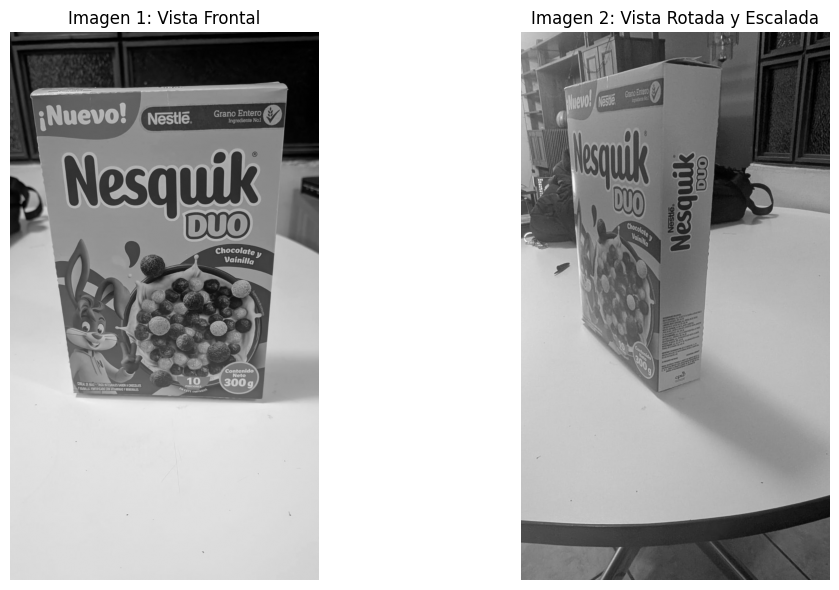

Dimensiones Imagen 1: (1600, 900)
Dimensiones Imagen 2: (1600, 900)


In [4]:
# Cargar las imágenes en escala de grises
img1 = cv2.imread('Images/Frontal.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('Images/Rotada.jpeg', cv2.IMREAD_GRAYSCALE)

# Verificar que se cargaron correctamente
if img1 is None or img2 is None:
    raise ValueError("Error al cargar las imágenes. Verifica las rutas.")

# Mostrar las imágenes cargadas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img1, cmap='gray')
axes[0].set_title('Imagen 1: Vista Frontal')
axes[0].axis('off')

axes[1].imshow(img2, cmap='gray')
axes[1].set_title('Imagen 2: Vista Rotada y Escalada')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Dimensiones Imagen 1: {img1.shape}")
print(f"Dimensiones Imagen 2: {img2.shape}")

## 3.Detección y Descripción con SIFT

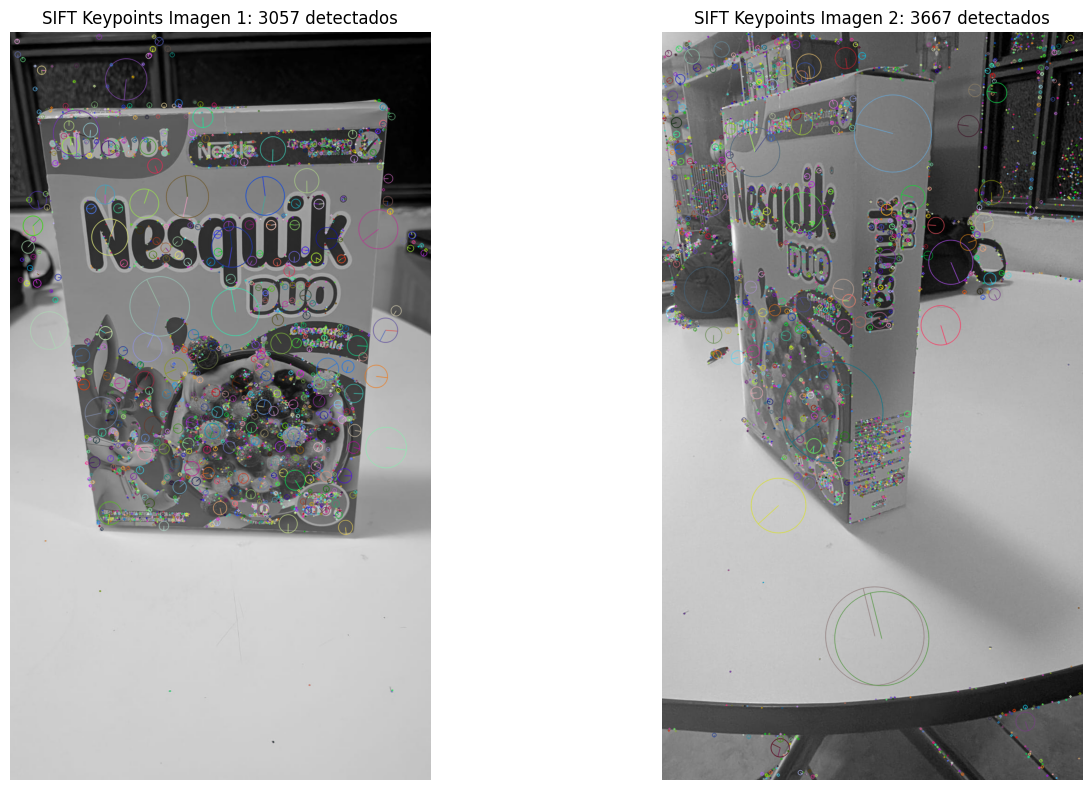

SIFT - Keypoints en Imagen 1: 3057
SIFT - Keypoints en Imagen 2: 3667
SIFT - Shape de descriptores: (3057, 128)


In [5]:
# Crear el detector SIFT
sift = cv2.SIFT_create()

# Detectar keypoints y calcular descriptores
keypoints_sift_1, descriptors_sift_1 = sift.detectAndCompute(img1, None)
keypoints_sift_2, descriptors_sift_2 = sift.detectAndCompute(img2, None)

# Visualizar keypoints detectados
img1_sift_kp = cv2.drawKeypoints(img1, keypoints_sift_1, None, 
                                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_sift_kp = cv2.drawKeypoints(img2, keypoints_sift_2, None, 
                                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].imshow(cv2.cvtColor(img1_sift_kp, cv2.COLOR_BGR2RGB))
axes[0].set_title(f'SIFT Keypoints Imagen 1: {len(keypoints_sift_1)} detectados')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img2_sift_kp, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'SIFT Keypoints Imagen 2: {len(keypoints_sift_2)} detectados')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"SIFT - Keypoints en Imagen 1: {len(keypoints_sift_1)}")
print(f"SIFT - Keypoints en Imagen 2: {len(keypoints_sift_2)}")
print(f"SIFT - Shape de descriptores: {descriptors_sift_1.shape}")

## 4.Detección y Descripción con ORB

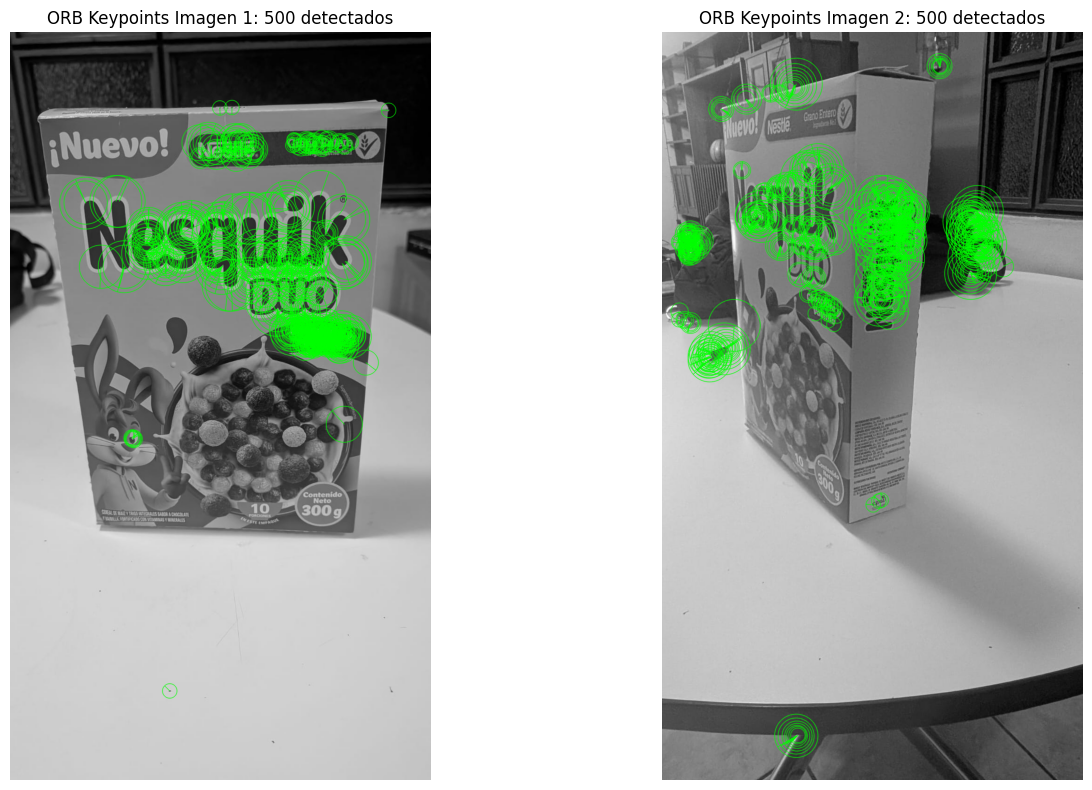

ORB - Keypoints en Imagen 1: 500
ORB - Keypoints en Imagen 2: 500
ORB - Shape de descriptores: (500, 32)


In [6]:
# Crear el detector ORB
orb = cv2.ORB_create()

# Detectar keypoints y calcular descriptores
keypoints_orb_1, descriptors_orb_1 = orb.detectAndCompute(img1, None)
keypoints_orb_2, descriptors_orb_2 = orb.detectAndCompute(img2, None)

# Visualizar keypoints detectados
img1_orb_kp = cv2.drawKeypoints(img1, keypoints_orb_1, None, 
                                 color=(0, 255, 0), 
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_orb_kp = cv2.drawKeypoints(img2, keypoints_orb_2, None, 
                                 color=(0, 255, 0), 
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].imshow(cv2.cvtColor(img1_orb_kp, cv2.COLOR_BGR2RGB))
axes[0].set_title(f'ORB Keypoints Imagen 1: {len(keypoints_orb_1)} detectados')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img2_orb_kp, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'ORB Keypoints Imagen 2: {len(keypoints_orb_2)} detectados')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"ORB - Keypoints en Imagen 1: {len(keypoints_orb_1)}")
print(f"ORB - Keypoints en Imagen 2: {len(keypoints_orb_2)}")
print(f"ORB - Shape de descriptores: {descriptors_orb_1.shape}")

## 5. Matching con SIFT (usando BFMatcher con norma L2)

In [7]:
# Crear BFMatcher con norma L2 (Euclidiana) para SIFT
bf_l2 = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# Encontrar los 2 mejores matches para cada descriptor (k=2 para Lowe's Ratio Test)
matches_sift = bf_l2.knnMatch(descriptors_sift_1, descriptors_sift_2, k=2)

print(f"SIFT - Matches encontrados (antes de filtrar): {len(matches_sift)}")

SIFT - Matches encontrados (antes de filtrar): 3057


 ## 6. Matching con ORB (usando BFMatcher con norma de Hamming)

In [8]:
# Crear BFMatcher con norma de Hamming para ORB
bf_hamming = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

# Encontrar los 2 mejores matches para cada descriptor
matches_orb = bf_hamming.knnMatch(descriptors_orb_1, descriptors_orb_2, k=2)

print(f"ORB - Matches encontrados (antes de filtrar): {len(matches_orb)}")

ORB - Matches encontrados (antes de filtrar): 500


## 7. Aplicar Lowe's Ratio Test (filtrar buenos matches)


In [9]:
# Aplicar Lowe's Ratio Test para SIFT
good_matches_sift = []
for match_pair in matches_sift:
    # Verificar que haya al menos 2 matches
    if len(match_pair) == 2:
        m, n = match_pair  # m = mejor match, n = segundo mejor match
        # Si la distancia del mejor match es < 0.75 * distancia del segundo mejor
        if m.distance < 0.75 * n.distance:
            good_matches_sift.append(m)

print(f"SIFT - Buenos matches (después de Ratio Test): {len(good_matches_sift)}")
print(f"SIFT - Porcentaje de matches filtrados: {len(good_matches_sift)/len(matches_sift)*100:.2f}%")

# Aplicar Lowe's Ratio Test para ORB
good_matches_orb = []
for match_pair in matches_orb:
    if len(match_pair) == 2:
        m, n = match_pair
        if m.distance < 0.75 * n.distance:
            good_matches_orb.append(m)

print(f"\nORB - Buenos matches (después de Ratio Test): {len(good_matches_orb)}")
print(f"ORB - Porcentaje de matches filtrados: {len(good_matches_orb)/len(matches_orb)*100:.2f}%")

SIFT - Buenos matches (después de Ratio Test): 121
SIFT - Porcentaje de matches filtrados: 3.96%

ORB - Buenos matches (después de Ratio Test): 34
ORB - Porcentaje de matches filtrados: 6.80%


## 8. Visualizar las correspondencias finales

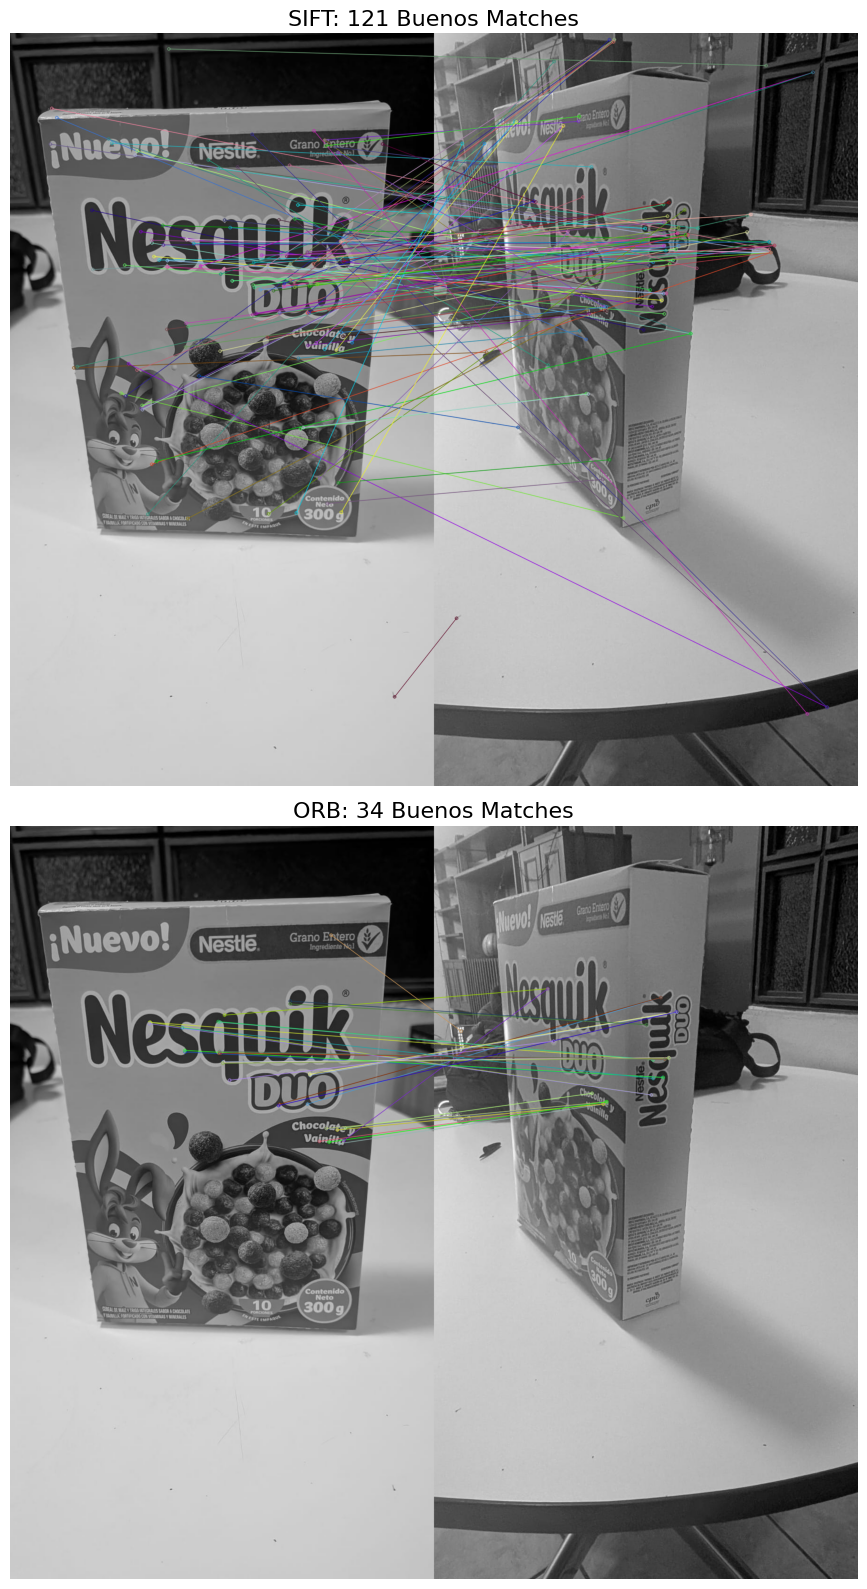

In [10]:
# Dibujar matches de SIFT
img_matches_sift = cv2.drawMatches(
    img1, keypoints_sift_1,
    img2, keypoints_sift_2,
    good_matches_sift, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Dibujar matches de ORB
img_matches_orb = cv2.drawMatches(
    img1, keypoints_orb_1,
    img2, keypoints_orb_2,
    good_matches_orb, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Visualizar ambos
fig, axes = plt.subplots(2, 1, figsize=(20, 16))

axes[0].imshow(cv2.cvtColor(img_matches_sift, cv2.COLOR_BGR2RGB))
axes[0].set_title(f'SIFT: {len(good_matches_sift)} Buenos Matches', fontsize=16)
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img_matches_orb, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'ORB: {len(good_matches_orb)} Buenos Matches', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 9. Funciones para medir tiempos

In [11]:
import time

def measure_detection_description(detector, img1, img2, n_iterations=10):
    """
    Mide el tiempo promedio de detección y descripción
    """
    times = []
    
    for _ in range(n_iterations):
        start = time.time()
        kp1, desc1 = detector.detectAndCompute(img1, None)
        kp2, desc2 = detector.detectAndCompute(img2, None)
        end = time.time()
        
        times.append((end - start) * 1000)  # Convertir a milisegundos
    
    avg_time = np.mean(times)
    std_time = np.std(times)
    
    return avg_time, std_time, kp1, desc1, kp2, desc2

def measure_matching(matcher, desc1, desc2, n_iterations=10):
    """
    Mide el tiempo promedio de matching
    """
    times = []
    
    for _ in range(n_iterations):
        start = time.time()
        matches = matcher.knnMatch(desc1, desc2, k=2)
        end = time.time()
        
        times.append((end - start) * 1000)  # Convertir a milisegundos
    
    avg_time = np.mean(times)
    std_time = np.std(times)
    
    return avg_time, std_time, matches

print("✓ Funciones de medición definidas")

✓ Funciones de medición definidas


## 10. Medir tiempos de SIFT

In [12]:
print("Midiendo SIFT...")
print("=" * 50)

# Medir detección y descripción
sift_detector = cv2.SIFT_create()
sift_detect_time, sift_detect_std, kp_sift_1, desc_sift_1, kp_sift_2, desc_sift_2 = \
    measure_detection_description(sift_detector, img1, img2, n_iterations=10)

print(f"Detección + Descripción: {sift_detect_time:.2f} ± {sift_detect_std:.2f} ms")

# Medir matching
bf_l2 = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
sift_match_time, sift_match_std, matches_sift_measured = \
    measure_matching(bf_l2, desc_sift_1, desc_sift_2, n_iterations=10)

print(f"Matching: {sift_match_time:.2f} ± {sift_match_std:.2f} ms")

# Tiempo total
sift_total_time = sift_detect_time + sift_match_time
print(f"Tiempo Total: {sift_total_time:.2f} ms")

# Aplicar Ratio Test y contar buenos matches
good_sift = []
for m_n in matches_sift_measured:
    if len(m_n) == 2:
        m, n = m_n
        if m.distance < 0.75 * n.distance:
            good_sift.append(m)

print(f"\nKeypoints detectados: Img1={len(kp_sift_1)}, Img2={len(kp_sift_2)}")
print(f"Buenos matches (post Ratio Test): {len(good_sift)}")
print("=" * 50)

Midiendo SIFT...
Detección + Descripción: 219.85 ± 8.45 ms
Matching: 21.81 ± 0.35 ms
Tiempo Total: 241.66 ms

Keypoints detectados: Img1=3057, Img2=3667
Buenos matches (post Ratio Test): 121


## 11. Medir tiempos de ORB


In [13]:
print("\nMidiendo ORB...")
print("=" * 50)

# Medir detección y descripción
orb_detector = cv2.ORB_create()
orb_detect_time, orb_detect_std, kp_orb_1, desc_orb_1, kp_orb_2, desc_orb_2 = \
    measure_detection_description(orb_detector, img1, img2, n_iterations=10)

print(f"Detección + Descripción: {orb_detect_time:.2f} ± {orb_detect_std:.2f} ms")

# Medir matching
bf_hamming = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
orb_match_time, orb_match_std, matches_orb_measured = \
    measure_matching(bf_hamming, desc_orb_1, desc_orb_2, n_iterations=10)

print(f"Matching: {orb_match_time:.2f} ± {orb_match_std:.2f} ms")

# Tiempo total
orb_total_time = orb_detect_time + orb_match_time
print(f"Tiempo Total: {orb_total_time:.2f} ms")

# Aplicar Ratio Test y contar buenos matches
good_orb = []
for m_n in matches_orb_measured:
    if len(m_n) == 2:
        m, n = m_n
        if m.distance < 0.75 * n.distance:
            good_orb.append(m)

print(f"\nKeypoints detectados: Img1={len(kp_orb_1)}, Img2={len(kp_orb_2)}")
print(f"Buenos matches (post Ratio Test): {len(good_orb)}")
print("=" * 50)


Midiendo ORB...
Detección + Descripción: 26.11 ± 1.12 ms
Matching: 0.55 ± 0.03 ms
Tiempo Total: 26.66 ms

Keypoints detectados: Img1=500, Img2=500
Buenos matches (post Ratio Test): 34


## 12. Crear tabla comparativa


In [15]:
import pandas as pd

# Crear DataFrame con los resultados
data = {
    'Algoritmo': ['SIFT', 'ORB'],
    'Detección + Descripción (ms)': [
        f"{sift_detect_time:.2f} ± {sift_detect_std:.2f}",
        f"{orb_detect_time:.2f} ± {orb_detect_std:.2f}"
    ],
    'Matching (ms)': [
        f"{sift_match_time:.2f} ± {sift_match_std:.2f}",
        f"{orb_match_time:.2f} ± {orb_match_std:.2f}"
    ],
    'Tiempo Total (ms)': [
        f"{sift_total_time:.2f}",
        f"{orb_total_time:.2f}"
    ],
    'Keypoints Imagen A': [len(kp_sift_1), len(kp_orb_1)],
    'Keypoints Imagen B': [len(kp_sift_2), len(kp_orb_2)],
    'Buenos Matches': [len(good_sift), len(good_orb)]
}

df_results = pd.DataFrame(data)

print("\n" + "="*80)
print("TABLA DE RESULTADOS")
print("="*80)
print(df_results.to_string(index=False))
print("="*80)

# Calcular métricas adicionales
fps_sift = 1000 / sift_total_time
fps_orb = 1000 / orb_total_time

print(f"\nFPS estimados:")
print(f"  SIFT: {fps_sift:.2f} FPS")
print(f"  ORB:  {fps_orb:.2f} FPS")
print(f"\nSpeedup de ORB sobre SIFT: {sift_total_time/orb_total_time:.2f}x más rápido")


TABLA DE RESULTADOS
Algoritmo Detección + Descripción (ms) Matching (ms) Tiempo Total (ms)  Keypoints Imagen A  Keypoints Imagen B  Buenos Matches
     SIFT                219.85 ± 8.45  21.81 ± 0.35            241.66                3057                3667             121
      ORB                 26.11 ± 1.12   0.55 ± 0.03             26.66                 500                 500              34

FPS estimados:
  SIFT: 4.14 FPS
  ORB:  37.52 FPS

Speedup de ORB sobre SIFT: 9.07x más rápido


### Tabla con resultados limpios

In [17]:
import pandas as pd

# Crear DataFrame con los resultados
data = {
    'Algoritmo': ['SIFT', 'ORB'],
    'Detección + Descripción (ms)': [
        round(sift_detect_time, 2),
        round(orb_detect_time, 2)
    ],
    'Matching (ms)': [
        round(sift_match_time, 2),
        round(orb_match_time, 2)
    ],
    'Tiempo Total (ms)': [
        round(sift_total_time, 2),
        round(orb_total_time, 2)
    ],
    'Keypoints Img A': [len(kp_sift_1), len(kp_orb_1)],
    'Keypoints Img B': [len(kp_sift_2), len(kp_orb_2)],
    'Buenos Matches': [len(good_sift), len(good_orb)],
    'FPS Estimados': [
        round(1000 / sift_total_time, 2),
        round(1000 / orb_total_time, 2)
    ]
}

df_results = pd.DataFrame(data)

# Aplicar estilos a la tabla
styled_df = df_results.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid black',
    'padding': '8px'
}).set_table_styles([
    {'selector': 'th', 'props': [
        ('background-color', '#2c3e50'),
        ('color', 'white'),
        ('font-weight', 'bold'),
        ('text-align', 'center'),
        ('padding', '10px'),
        ('border', '1px solid black')
    ]},
    {'selector': 'td', 'props': [
        ('border', '1px solid #ddd'),
        ('padding', '8px')
    ]},
    {'selector': 'tr:nth-of-type(even)', 'props': [
        ('background-color', '#f9f9f9')
    ]},
    {'selector': 'tr:hover', 'props': [
        ('background-color', '#e8f4f8')
    ]}
]).hide(axis='index')

# Mostrar la tabla estilizada
display(styled_df)

# Métricas adicionales
print("\nMETRICAS CLAVE:")
print("-" * 60)
print(f"Speedup ORB vs SIFT: {sift_total_time/orb_total_time:.2f}x mas rapido")
print(f"SIFT alcanza: {1000/sift_total_time:.2f} FPS")
print(f"ORB alcanza: {1000/orb_total_time:.2f} FPS")
print(f"Requisito Drone Carreras (60 FPS): {16.67:.2f} ms maximo")
print(f"   SIFT cumple: {'NO' if sift_total_time > 16.67 else 'SI'} ({sift_total_time:.2f} ms)")
print(f"   ORB cumple: {'NO' if orb_total_time > 16.67 else 'SI'} ({orb_total_time:.2f} ms)")
print("-" * 60)

Algoritmo,Detección + Descripción (ms),Matching (ms),Tiempo Total (ms),Keypoints Img A,Keypoints Img B,Buenos Matches,FPS Estimados
SIFT,219.850000,21.810000,241.660000,3057,3667,121,4.140000
ORB,26.110000,0.550000,26.660000,500,500,34,37.520000



METRICAS CLAVE:
------------------------------------------------------------
Speedup ORB vs SIFT: 9.07x mas rapido
SIFT alcanza: 4.14 FPS
ORB alcanza: 37.52 FPS
Requisito Drone Carreras (60 FPS): 16.67 ms maximo
   SIFT cumple: NO (241.66 ms)
   ORB cumple: NO (26.66 ms)
------------------------------------------------------------


## 13. Visualización comparativa de tiempos

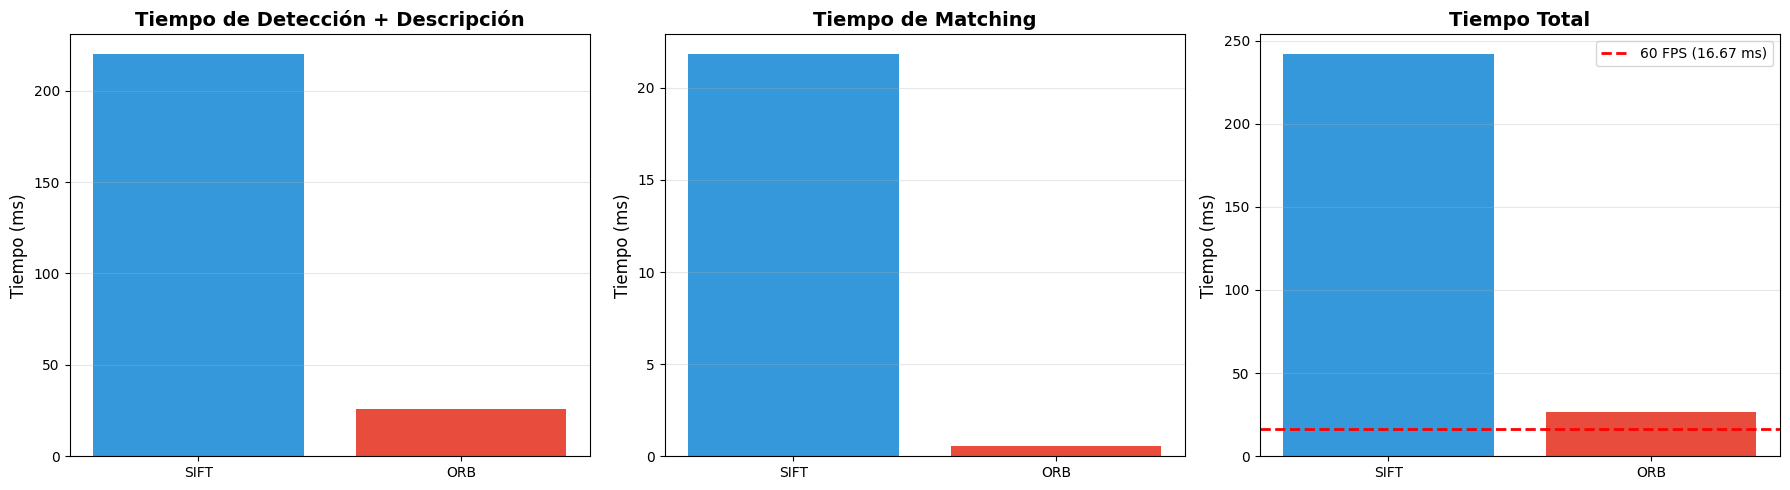

In [16]:
# Gráfico de barras comparativo
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Tiempo de detección
algorithms = ['SIFT', 'ORB']
detect_times = [sift_detect_time, orb_detect_time]
axes[0].bar(algorithms, detect_times, color=['#3498db', '#e74c3c'])
axes[0].set_ylabel('Tiempo (ms)', fontsize=12)
axes[0].set_title('Tiempo de Detección + Descripción', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Tiempo de matching
match_times = [sift_match_time, orb_match_time]
axes[1].bar(algorithms, match_times, color=['#3498db', '#e74c3c'])
axes[1].set_ylabel('Tiempo (ms)', fontsize=12)
axes[1].set_title('Tiempo de Matching', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Gráfico 3: Tiempo total
total_times = [sift_total_time, orb_total_time]
axes[2].bar(algorithms, total_times, color=['#3498db', '#e74c3c'])
axes[2].axhline(y=16.67, color='red', linestyle='--', linewidth=2, label='60 FPS (16.67 ms)')
axes[2].set_ylabel('Tiempo (ms)', fontsize=12)
axes[2].set_title('Tiempo Total', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()